<a href="https://colab.research.google.com/github/yingluliu/bond-data/blob/main/tntorch_bs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/rballester/tntorch.git


  Cloning https://github.com/rballester/tntorch.git to /tmp/pip-req-build-q597ysz5
  Running command git clone --filter=blob:none --quiet https://github.com/rballester/tntorch.git /tmp/pip-req-build-q597ysz5
  Resolved https://github.com/rballester/tntorch.git to commit 6be3903e37d30d13da4600d493dcf0e92016c01e
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━

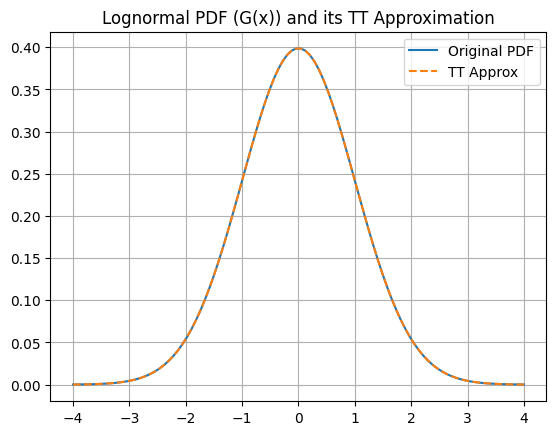

Approximate ∫G(x)dx ≈ 0.99995


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tntorch import Tensor

# Step 1: 设置网格范围和大小
n = 100                      # 网格点数（越大越精细）
x_min, x_max = -4, 4         # log-space 区间（覆盖绝大部分概率质量）
x = np.linspace(x_min, x_max, n)
dx = x[1] - x[0]             # 网格间距（用于近似积分）

# Step 2: 构建正态分布密度函数 G(x)
mu, sigma = 0.0, 1.0
G_values = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Step 3: 构建张量（shape = (n,1) 是为了兼容 TT）
G_tensor = Tensor(G_values.reshape(n, 1), ranks_tt=8)


# Step 4: 可视化原始 vs 压缩张量
plt.plot(x, G_values, label='Original PDF')
plt.plot(x, G_tensor.numpy().reshape(-1), '--', label='TT Approx')

plt.title("Lognormal PDF (G(x)) and its TT Approximation")
plt.legend()
plt.grid(True)
plt.show()

# Step 5: 检查归一化（近似积分）
approx_integral = G_tensor.sum().item() * dx
print(f"Approximate ∫G(x)dx ≈ {approx_integral:.5f}")


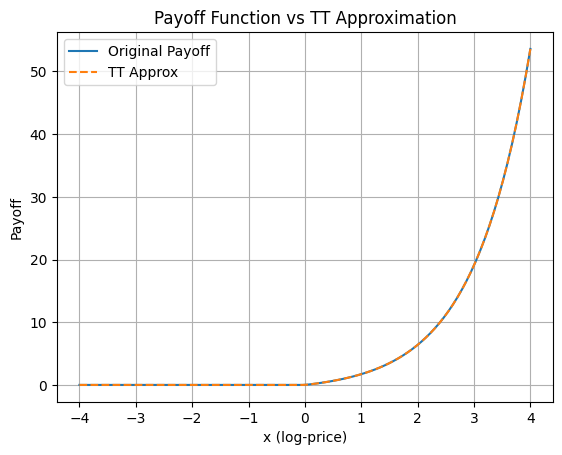

In [5]:
# ----------------------------------------
# 🔸 基础参数（保持和 G(x) 一致）
# ----------------------------------------
n = 100                         # 网格点数量
x = np.linspace(-4, 4, n)       # log-price 网格（和 G(x) 完全一致）
K = 1.0                         # 执行价格（strike）

# ----------------------------------------
# 🔸 构造 payoff 函数值：phi(x) = max(e^x - K, 0)
#     对每个 log-price 点，计算 call payoff
# ----------------------------------------
phi_values = np.maximum(np.exp(x) - K, 0)

# ----------------------------------------
# 🔸 构建成 TT 格式张量
#     必须 reshape 成 (n,1)，和 G_tensor 结构匹配
# ----------------------------------------
from tntorch import Tensor
phi_tensor = Tensor(phi_values.reshape(n, 1), ranks_tt=8)

# ----------------------------------------
# 🔸 可视化 payoff 函数和张量近似
# ----------------------------------------
import matplotlib.pyplot as plt

plt.plot(x, phi_values, label='Original Payoff')
plt.plot(x, phi_tensor.numpy().reshape(-1), '--', label='TT Approx')
plt.title('Payoff Function vs TT Approximation')
plt.xlabel('x (log-price)')
plt.ylabel('Payoff')
plt.legend()
plt.grid(True)
plt.show()
